In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [74]:
# 데이터 다운 사이트 : https://www.kaggle.com/datasets/zalando-research/fashionmnist

#### 1. 사전생성된 데이터 로드

In [2]:
from torchvision import datasets
import torchvision.transforms as transforms
training_data = datasets.FashionMNIST(
    root="data", # train과 test데이터가 저장된 경로
    train=True, # 학습인지 테스트인지 명시
    download=True, # root 경로에서 불러와지지 않을경우 인터넷에서 다운로드해올것인지?
    transform=transforms.ToTensor() # feature와 label 전처리 필요사항 명시
)

test_data = datasets.FashionMNIST(
    root="data", # train과 test데이터가 저장된 경로
    train=False, # 학습인지 테스트인지 명시
    download=True, # root 경로에서 불러와지지 않을경우 인터넷에서 다운로드해올것인지?
    transform=transforms.ToTensor() # feature와 label 전처리 필요사항 명시
)

In [22]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

input batch shape: torch.Size([64, 1, 28, 28])
output batch shape: torch.Size([64])


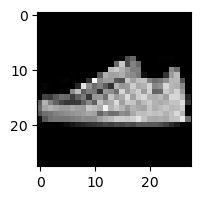

Label: 7


In [20]:
# 이미지 플로팅
input, output = next(iter(train_dataloader))

print(f"input batch shape: {input.size()}")
print(f"output batch shape: {output.size()}")

idx = 0
img = input[idx].squeeze()
label = output[idx]
plt.figure(figsize=[2,2])
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

#### 2. 사용자 정의 데이터세트

In [66]:
from torch.utils.data import Dataset

# 사용자 정의 데이터세트 클래스 구성
# 1. __init__
# 2. __len__
# 3. __getitem__

class CustomDataset(Dataset):
    
    # 객체생성시 한번실행
    # 데이터경로와 transform 정의 등..
    def __init__(self, data_path, transform=None, target_transform=None):
        
        data = pd.read_csv(data_path)
        Y_data = data['label']
        Y_data = np.array(Y_data)
        X_data = data.drop(columns='label',axis=1)
        X_data = np.array(X_data).reshape(-1,28,28,1).astype('float32')
        self.X_data = X_data
        self.Y_data = Y_data
        self.transform = transform
        self.target_transform = target_transform

    # 데이터세트의 총 개수를 리턴
    def __len__(self):
        return len(self.Y_data)

    # 인덱스를 기반으로 데이터세트로부터 샘플을 가져오는 함수 
    # 튜플형태로 리턴 : (입력,출력)
    def __getitem__(self, idx):            

        # 데이터 지정
        image = self.X_data[idx]
        label = self.Y_data[idx]
        
        # 입력 데이터 전처리
        if self.transform:
            image = self.transform(image)

        # 출력 데이터 전처리
        if self.target_transform:
            label = self.target_transform(label)

        return image, label

In [72]:
# 데이터전처리위한 transform 을 정의할때 여러단계일경우 묶는 기능을 Compose로 할 수 있음
import torchvision.transforms as transforms

train_path = "dataset/fashion-mnist_train.csv"
test_path = "dataset/fashion-mnist_test.csv"

# transforms.ToTensor() : PIL이미지,Numpy 배열 --> Pytorch image tensor로 변환 (배열구조 변경 및 scale 변환됨)
train_dataset = CustomDataset(train_path,
                              transform=transforms.Compose([transforms.ToTensor()]))


test_dataset = CustomDataset(test_path,
                             transform=transforms.Compose([transforms.ToTensor()]))

In [73]:
# "생성한 데이터세트 클래스"를 상속받은 "객체"를 입력으로 받음
# 데이터세트에서 데이터를 iterable 하게 가져옴
from torch.utils.data import DataLoader

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=True)

input batch shape: torch.Size([64, 1, 28, 28])
output batch shape: torch.Size([64])


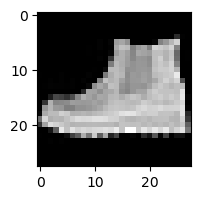

Label: 9


In [71]:
# 이미지 플로팅
input, output = next(iter(train_loader))
print(f"input batch shape: {input.size()}")
print(f"output batch shape: {output.size()}")

idx = 1
img = input[idx].squeeze()
label = output[idx]
plt.figure(figsize=[2,2])
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")